In [1]:

%pylab inline
import numpy as np
import numpy.random as rand
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import random as rng
import seaborn as sns
import pickle
import argparse
import pandas as pd 

import pickle

Populating the interactive namespace from numpy and matplotlib


In [4]:
cd /home/lansdell/projects/synthfeedback
sns.set_style('ticks')
#Load data from script
fn_in = './experiments/nodepert4_fixedw_exact/summary/2_establish_convergence_feedforward_output.npz'
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
tags = data['tags']
metrics = data['metrics']

In [5]:
print(metrics.shape)
tags

(4, 5, 1001, 10)


['loss',
 'acc',
 'loss_test',
 'acc_test',
 'align_B2',
 'norm_W2_B2',
 'sign_cong2',
 'align_B3',
 'norm_W3_B3',
 'sign_cong3']

## Make plots for fixed $W$

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


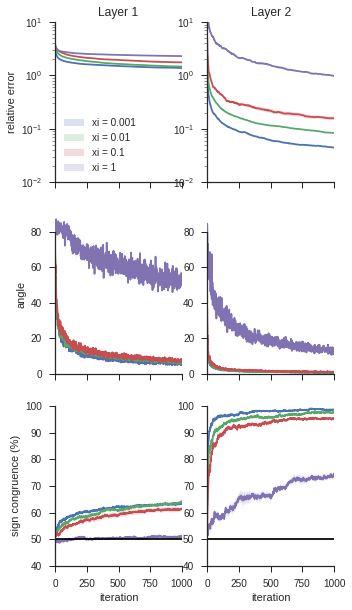

In [19]:
#Plot norms
var_xi = [1e-3, 1e-2, 1e-1, 1]
N = 4

#Error
idx = 5
fig,axes = plt.subplots(3,2,figsize=(5,10), sharex = True)
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[0,0], color='C%d'%i)
axes[0,0].set_ylabel('relative error');
axes[0,0].set_title('Layer 1');
axes[0,0].set_yscale('log')
axes[0,0].set_ylim([0.01, 10])
axes[0,0].legend(['xi = 0.001', 'xi = 0.01', 'xi = 0.1', 'xi = 1'])

idx = 8
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[0,1], color='C%d'%i)
axes[0,1].set_title('Layer 2');
axes[0,1].set_yscale('log')
axes[0,1].set_ylim([0.01, 10])

#alignment
idx = 4
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[1,0], color='C%d'%i)
axes[1,0].set_ylabel('angle');
axes[1,0].set_ylim([0, 90])

idx = 7
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[1,1], color='C%d'%i)
axes[1,1].set_ylim([0, 90])

#sign congruence
idx = 6
for i in range(N):
    sns.tsplot(100*metrics[i,:,:,idx], ax = axes[2,0], color='C%d'%i)
axes[2,0].set_xlabel('iteration');
axes[2,0].set_ylabel('sign congruence (%)');
axes[2,0].axhline(y = 50, color = 'black')
axes[2,0].set_ylim([40, 100])

idx = 9
for i in range(N):
    sns.tsplot(100*metrics[i,:,:,idx], ax = axes[2,1], color='C%d'%i)
axes[2,1].set_xlabel('iteration');
axes[2,1].axhline(y = 50, color = 'black')
axes[2,1].set_ylim([40, 100])
sns.despine(trim=True)

plt.savefig('./figures/fig_2_validate_nodepert.pdf')

In [56]:
metrics[:,0,-1,7]

array([ 1.11311483,  0.79105264,  0.85018831, 15.21459675])

## Make plots for variable $W$

In [83]:
sns.set_style('ticks')
#Load data from script
fn_in = './experiments/nodepert4_exact/summary/2b_establish_convergence_feedforward_output.npz'
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
tags = data['tags']
metrics = data['metrics']

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


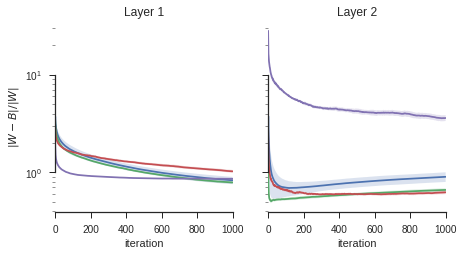

In [84]:
#Plot norms
var_xi = [1e-3, 1e-2, 1e-1, 1]
N = 4

idx = 5
fig,axes = plt.subplots(1,2,figsize=(7,3.5), sharey = True)
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[0], color='C%d'%i)
axes[0].set_xlabel('iteration');
axes[0].set_ylabel('$\|W-B\|/\|W\|$');
axes[0].set_title('Layer 1');
axes[0].set_yscale('log')

idx = 8
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[1], color='C%d'%i)
axes[1].set_xlabel('iteration');
axes[1].set_title('Layer 2');
axes[1].set_yscale('log')
sns.despine(trim=True)
plt.savefig('./figures/fig_2b_validate_nodepert_error.pdf')

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


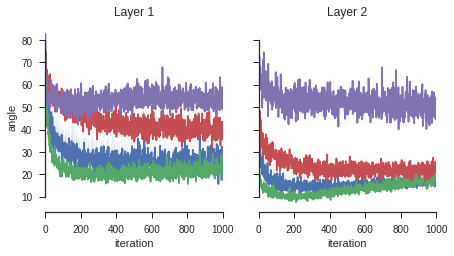

In [63]:
#Plot alignment
#Plot norms
var_xi = [1e-3, 1e-2, 1e-1, 1]
N = 4

idx = 4
fig,axes = plt.subplots(1,2,figsize=(7,3.5), sharey = True)
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[0], color='C%d'%i)
axes[0].set_xlabel('iteration');
axes[0].set_ylabel('angle');
axes[0].set_title('Layer 1');

idx = 7
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[1], color='C%d'%i)
axes[1].set_xlabel('iteration');
axes[1].set_title('Layer 2');
sns.despine(trim=True)
plt.savefig('./figures/fig_2b_validate_nodepert_alignment.pdf')

In [12]:
metrics[:,0,-1,7]

array([ 1.48885202,  1.05906343,  2.14046049, 25.75836945])

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


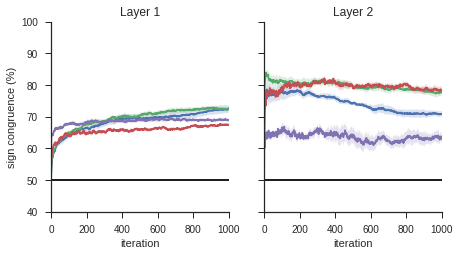

In [65]:
#Plot alignment
#Plot norms
var_xi = [1e-3, 1e-2, 1e-1, 1]
N = 4

idx = 6
fig,axes = plt.subplots(1,2,figsize=(7,3.5), sharey = True)
for i in range(N):
    sns.tsplot(100*metrics[i,:,:,idx], ax = axes[0], color='C%d'%i)
axes[0].set_xlabel('iteration');
axes[0].set_ylabel('sign congruence (%)');
axes[0].set_title('Layer 1');
axes[0].axhline(y = 50, color = 'black')

idx = 9
for i in range(N):
    sns.tsplot(100*metrics[i,:,:,idx], ax = axes[1], color='C%d'%i)
axes[1].set_xlabel('iteration');
axes[1].set_title('Layer 2');
axes[1].axhline(y = 50, color = 'black')
axes[0].set_ylim([40, 100])
axes[1].set_ylim([40, 100])
sns.despine(trim=True)
plt.savefig('./figures/fig_2b_validate_nodepert_congruence.pdf')

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


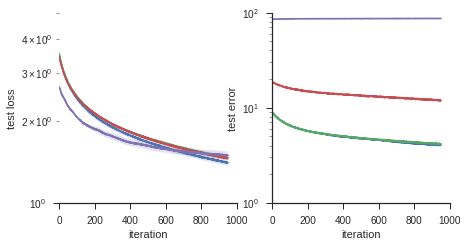

In [73]:
idx = 2
fig,axes = plt.subplots(1,2,figsize=(7,3.5))
for i in range(N):
    sns.tsplot(metrics[i,:,50:,idx], ax = axes[0], color='C%d'%i)
axes[0].set_xlabel('iteration');
axes[0].set_ylabel('test loss');
axes[0].set_yscale('log')
axes[0].set_ylim([1, 5])
axes[0].set_xlim([0, 1000])

idx = 3
for i in range(N):
    sns.tsplot(100-100*metrics[i,:,50:,idx], ax = axes[1], color='C%d'%i)
axes[1].set_ylabel('test error');
axes[1].set_xlabel('iteration');
axes[1].set_yscale('log')
axes[1].set_ylim([1, 100])
axes[1].set_xlim([0, 1000])
sns.despine(trim=True)
plt.savefig('./fig2_validate_node_pert_error.pdf')

In [68]:
metrics[:,0,-1,3]

array([0.95818752, 0.96078128, 0.88509375, 0.1328125 ])

## Make plots for variable $W$ with larger network

In [74]:
sns.set_style('ticks')
#Load data from script
fn_in = './experiments/nodepert4_exact/summary/2b_largenet_establish_convergence_feedforward_output.npz'
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
tags = data['tags']
metrics = data['metrics']

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe0 in position 3: ordinal not in range(128)

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


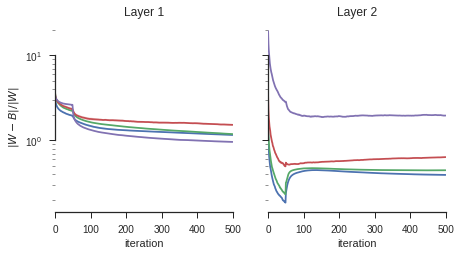

In [32]:
#Plot norms
var_xi = [1e-3, 1e-2, 1e-1, 1]
N = 4

idx = 5
fig,axes = plt.subplots(1,2,figsize=(7,3.5), sharey = True)
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[0], color='C%d'%i)
axes[0].set_xlabel('iteration');
axes[0].set_ylabel('$\|W-B\|/\|W\|$');
axes[0].set_title('Layer 1');
axes[0].set_yscale('log')

idx = 8
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[1], color='C%d'%i)
axes[1].set_xlabel('iteration');
axes[1].set_title('Layer 2');
axes[1].set_yscale('log')
sns.despine(trim=True)
#plt.savefig('./figures/fig_2b_validate_nodepert_error.pdf')

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


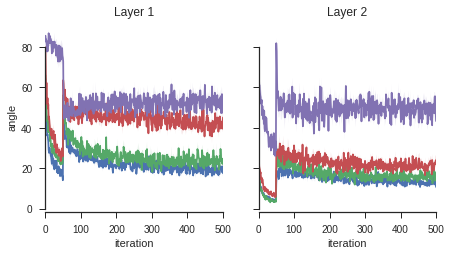

In [33]:
#Plot alignment
#Plot norms
var_xi = [1e-3, 1e-2, 1e-1, 1]
N = 4

idx = 4
fig,axes = plt.subplots(1,2,figsize=(7,3.5), sharey = True)
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[0], color='C%d'%i)
axes[0].set_xlabel('iteration');
axes[0].set_ylabel('angle');
axes[0].set_title('Layer 1');

idx = 7
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[1], color='C%d'%i)
axes[1].set_xlabel('iteration');
axes[1].set_title('Layer 2');
sns.despine(trim=True)
#plt.savefig('./figures/fig_2b_validate_nodepert_alignment.pdf')

In [12]:
metrics[:,0,-1,7]

array([ 1.48885202,  1.05906343,  2.14046049, 25.75836945])

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


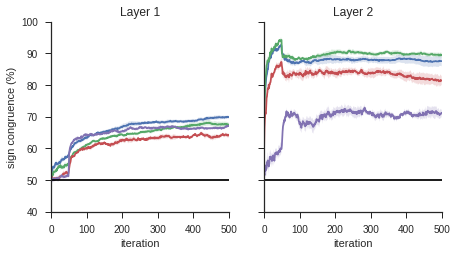

In [36]:
#Plot alignment
#Plot norms
var_xi = [1e-3, 1e-2, 1e-1, 1]
N = 4

idx = 6
fig,axes = plt.subplots(1,2,figsize=(7,3.5), sharey = True)
for i in range(N):
    sns.tsplot(100*metrics[i,:,:,idx], ax = axes[0], color='C%d'%i)
axes[0].set_xlabel('iteration');
axes[0].set_ylabel('sign congruence (%)');
axes[0].set_title('Layer 1');
axes[0].axhline(y = 50, color = 'black')

idx = 9
for i in range(N):
    sns.tsplot(100*metrics[i,:,:,idx], ax = axes[1], color='C%d'%i)
axes[1].set_xlabel('iteration');
axes[1].set_title('Layer 2');
axes[1].axhline(y = 50, color = 'black')
axes[0].set_ylim([40, 100])
axes[1].set_ylim([40, 100])
sns.despine(trim=True)
#plt.savefig('./figures/fig_2b_validate_nodepert_congruence.pdf')

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


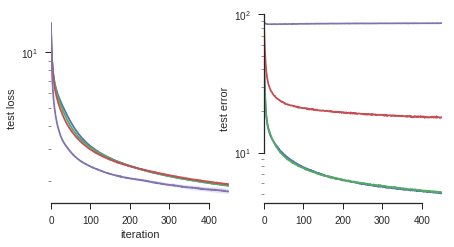

In [45]:
idx = 2
fig,axes = plt.subplots(1,2,figsize=(7,3.5))
for i in range(N):
    sns.tsplot(metrics[i,:,50:,idx], ax = axes[0], color='C%d'%i)
axes[0].set_xlabel('iteration');
axes[0].set_ylabel('test loss');
axes[0].set_yscale('log')

idx = 3
for i in range(N):
    sns.tsplot(100-100*metrics[i,:,50:,idx], ax = axes[1], color='C%d'%i)
axes[1].set_ylabel('test error');
axes[1].set_yscale('log')
sns.despine(trim=True)

In [43]:
metrics[:,0,-1,3]

array([0.94815624, 0.94621873, 0.83375001, 0.13537499])

## Feedback alignment

In [75]:
sns.set_style('ticks')
#Load data from script
fn_in = './experiments/feedbackalignment4_small/summary/2b_establish_convergence_feedforward_feedbackalignment_output.npz'
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
tags = data['tags']
metrics = data['metrics']

In [76]:
metrics.shape

(1, 1, 1001, 10)

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


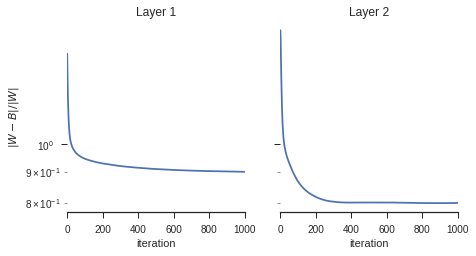

In [77]:
#Plot norms
var_xi = [1e-3, 1e-2, 1e-1, 1]
N = 1

idx = 5
fig,axes = plt.subplots(1,2,figsize=(7,3.5), sharey = True)
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[0], color='C%d'%i)
axes[0].set_xlabel('iteration');
axes[0].set_ylabel('$\|W-B\|/\|W\|$');
axes[0].set_title('Layer 1');
axes[0].set_yscale('log')

idx = 8
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[1], color='C%d'%i)
axes[1].set_xlabel('iteration');
axes[1].set_title('Layer 2');
axes[1].set_yscale('log')
sns.despine(trim=True)
#plt.savefig('./figures/fig_2b_validate_nodepert_error.pdf')

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


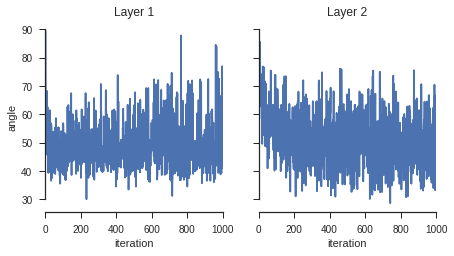

In [79]:
#Plot alignment
#Plot norms
var_xi = [1e-3, 1e-2, 1e-1, 1]
N = 1

idx = 4
fig,axes = plt.subplots(1,2,figsize=(7,3.5), sharey = True)
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[0], color='C%d'%i)
axes[0].set_xlabel('iteration');
axes[0].set_ylabel('angle');
axes[0].set_title('Layer 1');

idx = 7
for i in range(N):
    sns.tsplot(metrics[i,:,:,idx], ax = axes[1], color='C%d'%i)
axes[1].set_xlabel('iteration');
axes[1].set_title('Layer 2');
sns.despine(trim=True)
#plt.savefig('./figures/fig_2b_validate_nodepert_alignment.pdf')

In [12]:
metrics[:,0,-1,7]

array([ 1.48885202,  1.05906343,  2.14046049, 25.75836945])

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


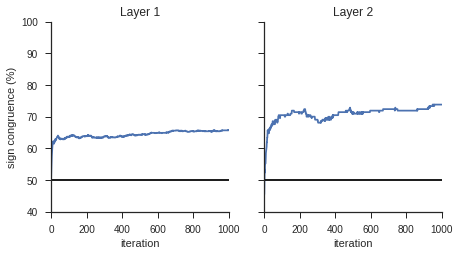

In [80]:
#Plot alignment
#Plot norms
var_xi = [1e-3, 1e-2, 1e-1, 1]
N = 1

idx = 6
fig,axes = plt.subplots(1,2,figsize=(7,3.5), sharey = True)
for i in range(N):
    sns.tsplot(100*metrics[i,:,:,idx], ax = axes[0], color='C%d'%i)
axes[0].set_xlabel('iteration');
axes[0].set_ylabel('sign congruence (%)');
axes[0].set_title('Layer 1');
axes[0].axhline(y = 50, color = 'black')

idx = 9
for i in range(N):
    sns.tsplot(100*metrics[i,:,:,idx], ax = axes[1], color='C%d'%i)
axes[1].set_xlabel('iteration');
axes[1].set_title('Layer 2');
axes[1].axhline(y = 50, color = 'black')
axes[0].set_ylim([40, 100])
axes[1].set_ylim([40, 100])
sns.despine(trim=True)
#plt.savefig('./figures/fig_2b_validate_nodepert_congruence.pdf')

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


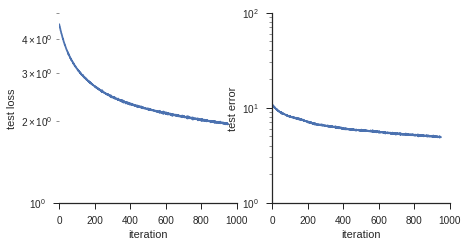

In [81]:
idx = 2
fig,axes = plt.subplots(1,2,figsize=(7,3.5))
for i in range(N):
    sns.tsplot(metrics[i,:,50:,idx], ax = axes[0], color='C%d'%i)
axes[0].set_xlabel('iteration');
axes[0].set_ylabel('test loss');
axes[0].set_yscale('log')
axes[0].set_ylim([1, 5])
axes[0].set_xlim([0, 1000])

idx = 3
for i in range(N):
    sns.tsplot(100-100*metrics[i,:,50:,idx], ax = axes[1], color='C%d'%i)
axes[1].set_ylabel('test error');
axes[1].set_xlabel('iteration');
axes[1].set_yscale('log')
axes[1].set_ylim([1, 100])
axes[1].set_xlim([0, 1000])
sns.despine(trim=True)
#plt.savefig('./fig2_validate_node_pert_error.pdf')

In [82]:
metrics[:,0,-1,3]

array([0.95115626])